In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import *

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img

import cv2
import itertools
import pathlib
import warnings
from PIL import Image
from random import randint
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix


from tensorflow import keras
from keras import layers
import tensorflow as tf
#import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger
#model.optimizer.get_config()

from PIL import Image

filepath = r"/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.weights.h5"

### example___filepath = "path to weight directory/breastCancer_geometric.h5"


checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_weights_only=True,
                             save_best_only=True, mode='max')

log_csv = CSVLogger(r'/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.csv', separator=',', append=False)
### example___CSVLogger('path to logs directory/breastCancer_geometric.csv')

callbacks_list = [checkpoint1,log_csv]

In [ ]:
# import the libraries as shown below
from tensorflow.keras.layers import *

# from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from PIL import Image, ImageOps
import glob
import uuid
import os
import numpy as np

benign = "/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign"
aug_benign = "/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/augmented_image/benign"
malignant = "/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/malignant"
aug_malignant = "/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/augmented_image/malignant"

def augment_image(src_image_path, dst_image_path, n=True):
    images = glob.glob(os.path.join(src_image_path, "*"))  # Use os.path.join for cross-platform compatibility

    angles = [45, -45, 75, -75]

    for img_path in images:
        aug_images = augment(img_path, angles, n)

        for aug_img in aug_images:
            img_id = str(uuid.uuid4())
            img_dir_path = os.path.join(dst_image_path, img_id + ".jpg")  # Use os.path.join for cross-platform compatibility
            aug_img.save(img_dir_path)
            aug_img.close()

# Function to create the destination directory if it doesn't exist
def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def add_pad(image, pad=80):
    image = np.array(image)[..., :3]
    image = Image.fromarray(image)

    padding = pad
    padding_image = ImageOps.expand(image=image, border=padding, fill="white")
    size = (128, 128)
    padding_image = padding_image.resize(size)

    return padding_image

def augment(img_path, angles, n=True):
    print("Augmenting:", img_path)
    img = Image.open(img_path)
    aug_img = [img.copy()]  # Original image without any augmentation

    # Flip
    aug_img.append(img.transpose(Image.FLIP_LEFT_RIGHT))
    aug_img.append(img.transpose(Image.FLIP_TOP_BOTTOM))

    for a in angles:
        if n:
            r = img.rotate(a, expand=1, fillcolor="white")
            fh = r.transpose(Image.FLIP_LEFT_RIGHT)
            fv = r.transpose(Image.FLIP_TOP_BOTTOM)
            aug_img.append(fh)
            aug_img.append(fv)
            aug_img.append(r)

    return aug_img

# Create destination directories if they don't exist
create_directory_if_not_exists(aug_benign)
create_directory_if_not_exists(aug_malignant)

# augment_image(src_path, dst_path)
augment_image(benign, aug_benign)
augment_image(malignant, aug_malignant)


Streaming output truncated to the last 5000 lines.
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign/melanoma_1201.jpg
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign/melanoma_2038.jpg
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign/melanoma_1728.jpg
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign/melanoma_1637.jpg
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign/melanoma_1681.jpg
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign/melanoma_1429.jpg
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/train/benign/melanoma_2131.jpg
Augmenting: /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/data

In [ ]:
import shutil

# Combine images for benign class
combined_benign = []
combined_benign.extend(glob.glob(os.path.join(benign, "*")))
combined_benign.extend(glob.glob(os.path.join(aug_benign, "*")))
np.random.shuffle(combined_benign)

# Combine images for malignant class
combined_malignant = []
combined_malignant.extend(glob.glob(os.path.join(malignant, "*")))
combined_malignant.extend(glob.glob(os.path.join(aug_malignant, "*")))
np.random.shuffle(combined_malignant)

# Destination directories
combined_dir_benign = "/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/combined/benign"
combined_dir_malignant = "/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/combined/malignant"

# Create destination directories if they don't exist
os.makedirs(combined_dir_benign, exist_ok=True)
os.makedirs(combined_dir_malignant, exist_ok=True)

# Move combined images to destination directories
for i, img_path in enumerate(combined_benign):
    shutil.move(img_path, os.path.join(combined_dir_benign, f"benign_{i}.jpg"))

for i, img_path in enumerate(combined_malignant):
    shutil.move(img_path, os.path.join(combined_dir_malignant, f"malignant_{i}.jpg"))

print("Combined and shuffled images saved successfully.")


Combined and shuffled images saved successfully.


In [ ]:
image_generator = ImageDataGenerator(

    rescale=1.0/255,validation_split=0.1
    )

y_generator=ImageDataGenerator(rescale=1.0/255,validation_split=0.1)



training_set = image_generator.flow_from_directory(batch_size=64,directory='/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/combined',
                                                 #shuffle=True,
                                                 target_size=(128,128),
                                                 subset="training",
                                                 color_mode='rgb',
                                                 shuffle=True,
                                                 seed=42,
                                                 class_mode = "categorical"
                                                 )


validation_dataset = y_generator.flow_from_directory(batch_size=64,
                                                 directory='/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/combined',
                                                 shuffle=True,
                                                 target_size=(128,128),
                                                 subset="validation",

                                                color_mode='rgb',
                                                 class_mode = "categorical"  )




Found 138312 images belonging to 2 classes.
Found 15368 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/melanoma_cancer_dataset/test',
                                            target_size=(128,128),
                                            batch_size = 64,
                                            shuffle=False,
                                            color_mode='rgb',
                                            class_mode =  "categorical"
                                            )


Found 1000 images belonging to 2 classes.


In [ ]:
IMG_HEIGHT= 128
IMG_WIDTH = 128

In [ ]:
model = keras.models.Sequential()
#model.add(data_augmentation)
#model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(2,"softmax"))

In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools


In [ ]:
model.compile(optimizer='adam',  # You can choose a different optimizer like 'adam' or 'sgd'
              loss='categorical_crossentropy',  # Specify your loss function
              metrics=['accuracy'])  # Add any metrics you want to monitor during training

r = model.fit(x=training_set, epochs=10, verbose=1, callbacks=callbacks_list,
              validation_data=validation_dataset, validation_steps=None, shuffle=False)


Epoch 1/10
2162/2162 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8413 - loss: 0.4353
Epoch 1: val_accuracy improved from -inf to 0.89947, saving model to /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.weights.h5
2162/2162 ━━━━━━━━━━━━━━━━━━━━ 4727s 2s/step - accuracy: 0.8413 - loss: 0.4353 - val_accuracy: 0.8995 - val_loss: 0.2437
Epoch 2/10
2162/2162 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9049 - loss: 0.2260
Epoch 2: val_accuracy improved from 0.89947 to 0.91183, saving model to /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.weights.h5
2162/2162 ━━━━━━━━━━━━━━━━━━━━ 3627s 2s/step - accuracy: 0.9050 - loss: 0.2260 - val_accuracy: 0.9118 - val_loss: 0.2176
Epoch 3/10
2162/2162 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9177 - loss: 0.1989
Epoch 3: val_accuracy improved from 0.91183 to 0.92439, saving model to /content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.weights.h5
2162/2162 ━━━━━━━━━━━━━━━━━━━━ 3178s 1s/step - accuracy: 0.917

In [ ]:
# Build the model
model.build((None, 128,128,3))

In [ ]:
model.load_weights(r"/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.weights.h5")
Adam = keras.optimizers.Adam(learning_rate=0.001)

# Use model.evaluate instead of model.evaluate_generator
preds = model.evaluate(training_set)
print ("Loss = ",float(preds[0]))
print ("train Accuracy = ",float(preds[1])*100)

2162/2162 ━━━━━━━━━━━━━━━━━━━━ 1316s 608ms/step - accuracy: 0.9628 - loss: 0.0981
Loss =  0.09847794473171234
train Accuracy =  96.2591826915741


In [ ]:
from tensorflow import keras
model.load_weights(r"/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.weights.h5")
Adam = keras.optimizers.Adam(learning_rate=0.001)

preds = model.evaluate(test_set)  # Evaluate the model using the test_set
print ("Loss = ",float(preds[0]))
print ("test Accuracy = ",float(preds[1])*100)

16/16 ━━━━━━━━━━━━━━━━━━━━ 295s 20s/step - accuracy: 0.9347 - loss: 0.1989
Loss =  0.21762530505657196
test Accuracy =  92.1999990940094


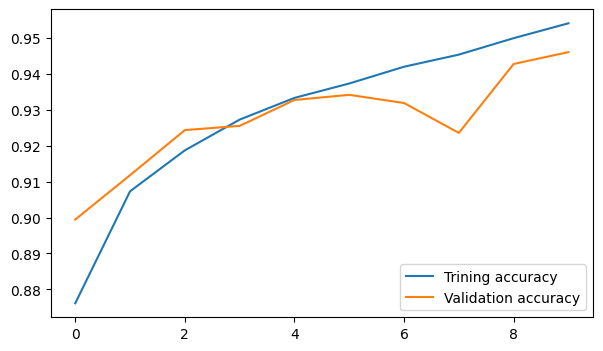

In [ ]:
### loss and accuracy curve ### updated !!!!!!!!!!

import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


fin1= pd.read_csv(r'/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/CNN.csv')


### accuracy curve ###
plt.figure(figsize=(7,4))
plt.plot(fin1['accuracy'], label='Trining accuracy')
plt.plot(fin1['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')


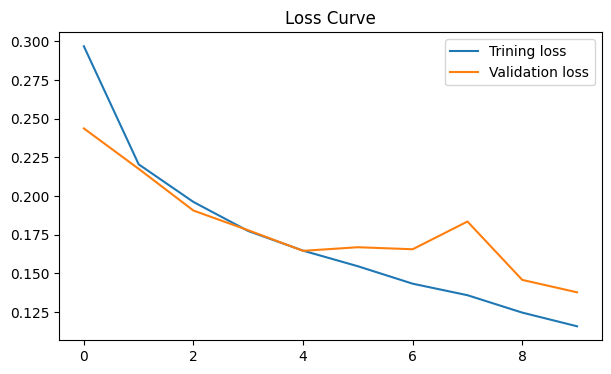

In [ ]:
### loss curve ###

plt.figure(figsize=(7,4))
plt.plot(fin1['loss'], label='Trining loss')
plt.plot(fin1['val_loss'], label='Validation loss')

plt.title('Loss Curve')

plt.savefig(r'/content/drive/MyDrive/Melonoma- Durjoy Voumik sir/dataset/Zrms_loss.png', dpi = 300)
plt.legend(loc='upper right')

16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 604ms/step
              precision    recall  f1-score   support

      benign       0.90      0.95      0.92       500
   malignant       0.95      0.89      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000

Confusion Matrix:
[[477  23]
 [ 55 445]]


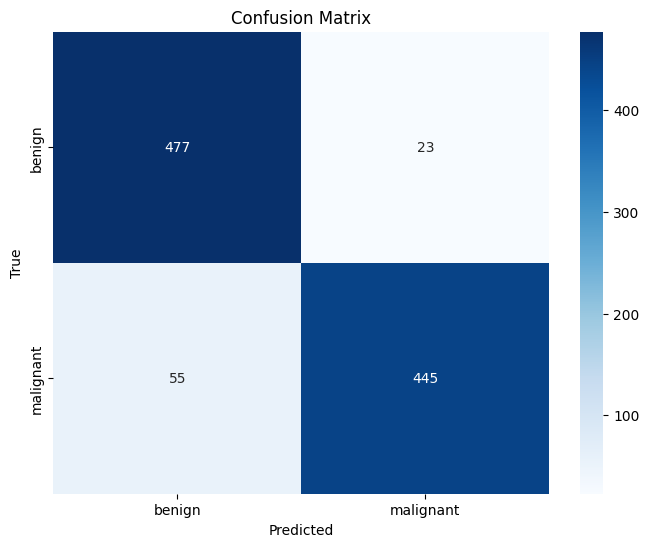

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Make predictions on the validation or test dataset
predictions = model.predict(test_set)  # Use the appropriate dataset

# Convert the predicted probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true class labels from the validation or test dataset
true_classes = test_set.classes  # Use the appropriate dataset

# Generate and print the classification report
class_names = test_set.class_indices
class_labels = list(class_names.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Generate and plot the confusion matrix
confusion = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(confusion)

# You can also use a heatmap to visualize the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━

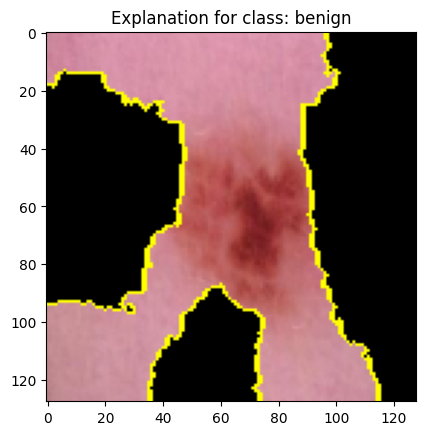

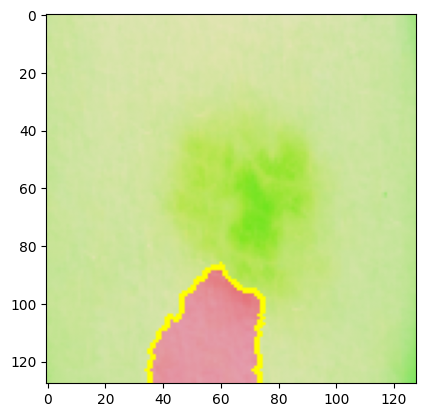

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
!pip install lime
import lime
import lime.lime_image
from skimage.segmentation import mark_boundaries # Import mark_boundaries

# Create a LimeImageExplainer object
explainer = lime.lime_image.LimeImageExplainer()

# Select a random image from the test set for explanation
idx = randint(0, len(test_set.filenames) - 1)  # Choose a random image index
image_path = test_set.filepaths[idx]
image = Image.open(image_path).resize((128, 128))
image = np.array(image) / 255.0  # Normalize the image

# Get the model's prediction for the chosen image
prediction = model.predict(np.expand_dims(image, axis=0))

# Explain the prediction using LIME
explanation = explainer.explain_instance(image,
                                        model.predict,
                                        top_labels=2,
                                        hide_color=0,
                                        num_samples=1000) # Increase num_samples for better results

# Display the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp, mask)) # Now mark_boundaries is defined and can be used
plt.title(f"Explanation for class: {class_labels[explanation.top_labels[0]]}")
plt.show()

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp, mask)) # Now mark_boundaries is defined and can be used
plt.show()